In [1]:
import os 
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cover image location
cover_grey_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images Greyscale"
# LSB Greyscale
lsbg_dir = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB Greyscale"

In [3]:
# Combine cover image data into a single array
cover_data = []
for i, filename in enumerate(os.listdir(cover_grey_dir)):
    cover_image = cv2.imread(cover_grey_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    cover_data.append([cover_image])
# The length of the array should be 60
print(len(cover_data))

60


In [4]:
# Combine stego image data into a single array
stego_data = []
for i, filename in enumerate(os.listdir(lsbg_dir)):
    stego_image = cv2.imread(lsbg_dir + "/" + filename, cv2.IMREAD_UNCHANGED)
    stego_data.append([stego_image])
# The length of the array should be 60
print(len(stego_data))

60


In [5]:
# Combine cover and stego images with corresponding labels 
labeled_data = []
for instance in cover_data:
    labeled_data.append([instance, 0])
for instance in stego_data:
    labeled_data.append([instance, 1])
# The length of the array should be 120
len(labeled_data)

120

Text(0.5, 1.0, '0')

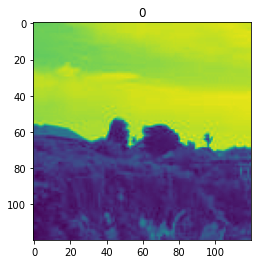

In [6]:
plt.imshow(np.array(labeled_data[1][0]).reshape(120,120,1))
plt.title(labeled_data[0][1])

In [7]:
# Separate labels from data
X = []
Y = []
for img, label in labeled_data:
    X.append(img)
    Y.append(label)

In [8]:
print(len(X))
print(len(Y))

120
120


<AxesSubplot:ylabel='count'>

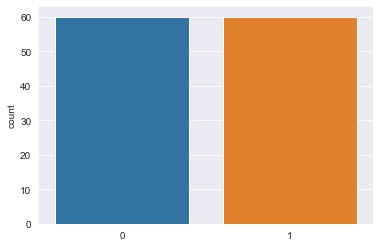

In [9]:
sns.set_style('darkgrid')
sns.countplot(x = Y)

In [10]:
# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [12]:
# Normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

<AxesSubplot:ylabel='count'>

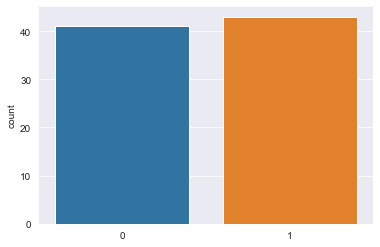

In [13]:
sns.countplot(x = y_train)

In [63]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 118, 118, 32)      320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 43264)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)              

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_26 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 1, 120, 120)
